# Imports

In [1]:
%reload_ext nb_black
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly
import seaborn as sns

%matplotlib inline
from scipy import stats

plt.style.use(["dark_background"])

import prince

<IPython.core.display.Javascript object>

In [2]:
path = "~/github/capstone_2/hospital_los/data/los_train.csv"
df = pd.read_csv(path, index_col="case_id")
df.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
case_id,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


<IPython.core.display.Javascript object>

In [3]:
df.shape

(318438, 17)

<IPython.core.display.Javascript object>

In [4]:
# checking nulls
df.isna().mean().sort_values(ascending=False)

# drop nulls
df = df.dropna()

<IPython.core.display.Javascript object>

In [5]:
# making Age a numeric column from a slice of the first character cast as an int
df.loc[:, "Age"] = df.Age.str.slice(0, 1).astype(int)
# df.loc[:, "Age"] = df.Age.str.slice(0, 1)

# making Stay a numeric column from a slice of the first character
df.loc[:, "Stay"] = df.Stay.str.slice(0, 1)
# "More than 100 days" became "M" so chaning to "10"
df.loc[df.Stay == "M", "Stay"] = "10"
#  cast as an int
df.loc[:, "Stay"] = df.Stay.astype(int)

# rename columns to lowercase
df.columns = map(str.lower, df.columns)

# remove spaces in columns name
df.columns = df.columns.str.replace(" ", "_")

<IPython.core.display.Javascript object>

# Dimensionality Reduction Visualization

In [6]:
df.head()

,hospital_code,hospital_type_code,city_code_hospital,hospital_region_code,available_extra_rooms_in_hospital,department,ward_type,ward_facility_code,bed_grade,patientid,city_code_patient,type_of_admission,severity_of_illness,visitors_with_patient,age,admission_deposit,stay
case_id,,,,,,,,,,,,,,,,,
1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,5,4911.0,0
2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,5,5954.0,4
3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,5,4745.0,3
4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,5,7272.0,4
5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,5,5558.0,4


<IPython.core.display.Javascript object>

In [7]:
x_df = df[df.hospital_region_code == "X"].drop(columns=["hospital_region_code"])
y_df = df[df.hospital_region_code == "Y"].drop(columns=["hospital_region_code"])
z_df = df[df.hospital_region_code == "Z"].drop(columns=["hospital_region_code"])

for column in df.columns:
    print(column)
    print(df[column].nunique())

hospital_code
32
hospital_type_code
7
city_code_hospital
11
hospital_region_code
3
available_extra_rooms_in_hospital
18
department
5
ward_type
6
ward_facility_code
6
bed_grade
4
patientid
90344
city_code_patient
37
type_of_admission
3
severity_of_illness
3
visitors_with_patient
28
age
10
admission_deposit
7283
stay
11


<IPython.core.display.Javascript object>

In [8]:
# df of only categorical vars
cats = df.drop(
    columns=[
        "patientid",
        "city_code_patient",
        "admission_deposit",
        "visitors_with_patient",
        "bed_grade",
        "hospital_code",
        "available_extra_rooms_in_hospital",
    ]
)

x_cats = x_df.drop(
    columns=[
        "patientid",
        "city_code_patient",
        "admission_deposit",
        "visitors_with_patient",
        "bed_grade",
        "hospital_code",
        "available_extra_rooms_in_hospital",
    ]
)
y_cats = y_df.drop(
    columns=[
        "patientid",
        "city_code_patient",
        "admission_deposit",
        "visitors_with_patient",
        "bed_grade",
        "hospital_code",
        "available_extra_rooms_in_hospital",
    ]
)
z_cats = z_df.drop(
    columns=[
        "patientid",
        "city_code_patient",
        "admission_deposit",
        "visitors_with_patient",
        "bed_grade",
        "hospital_code",
        "available_extra_rooms_in_hospital",
    ]
)
# cat_data.head()

<IPython.core.display.Javascript object>

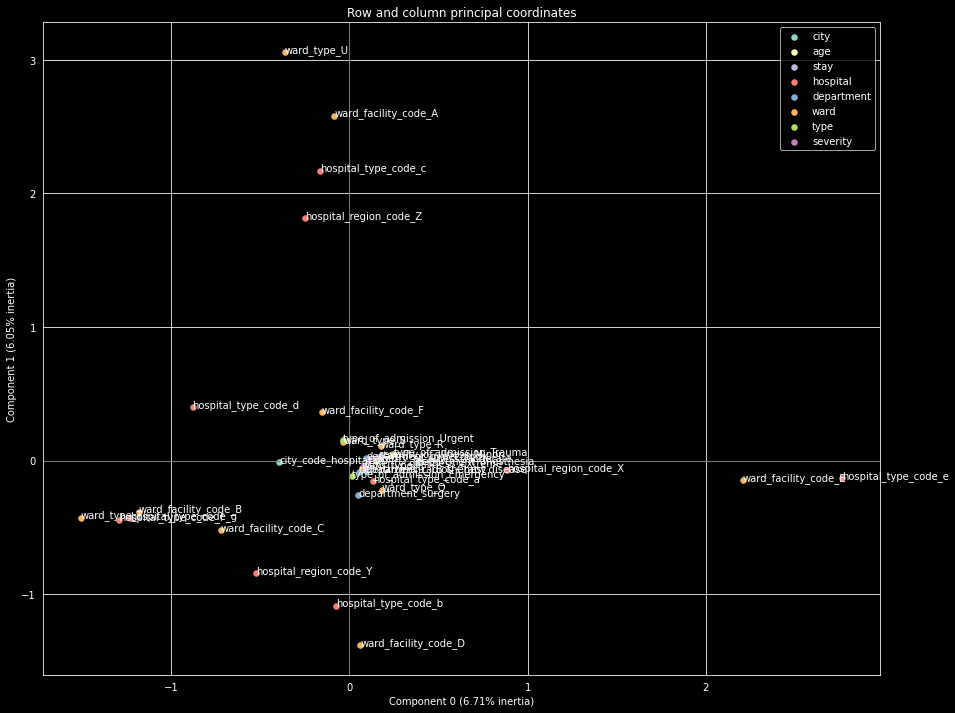

<IPython.core.display.Javascript object>

In [9]:
# cats mca model object
model = prince.MCA()
mca = model.fit(cats)
coordinates = mca.transform(cats)

# mca results Visualization
ax = mca.plot_coordinates(
    X=cats,
    ax=None,
    figsize=(15, 12),
    show_row_points=False,
    #     row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=True,
    legend_n_cols=1,
)

Region X


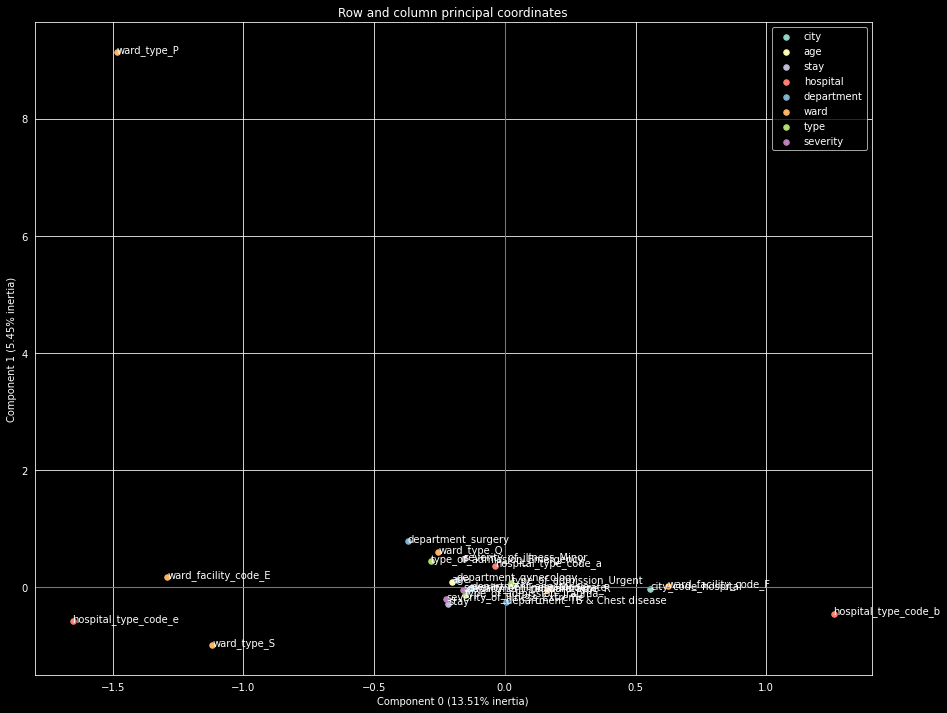

<IPython.core.display.Javascript object>

In [10]:
# hospital region X df mca model object
model = prince.MCA()
mca = model.fit(x_cats)
coordinates = mca.transform(x_cats)

# mca results Visualization
print("Region X")
ax = mca.plot_coordinates(
    X=x_cats,
    ax=None,
    figsize=(15, 12),
    show_row_points=False,
    #     row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=True,
    legend_n_cols=1,
)

Region Y


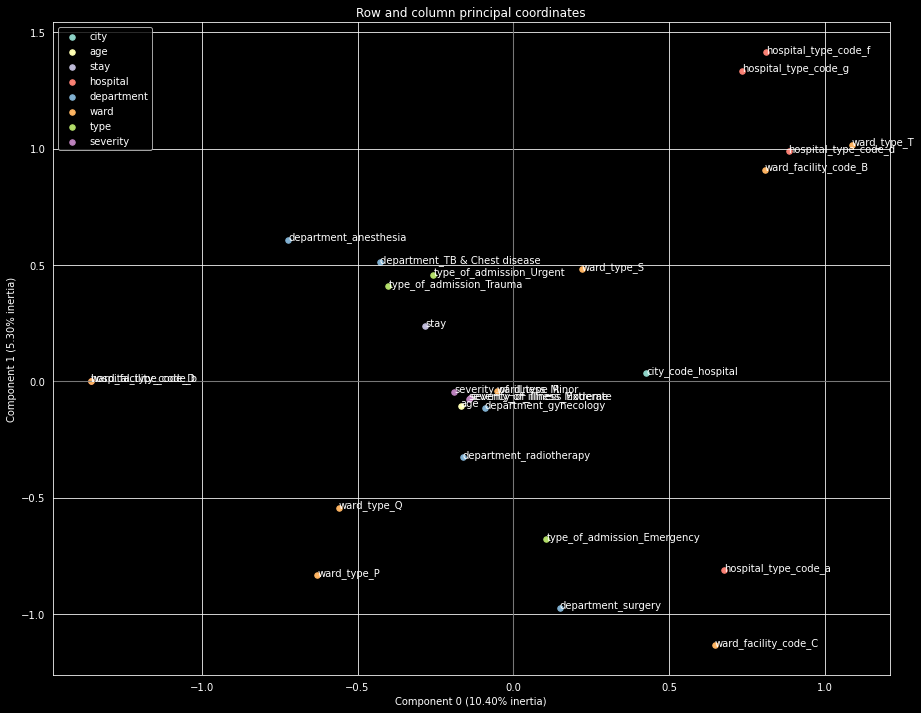

<IPython.core.display.Javascript object>

In [11]:
# hospital region Y df mca model object
model = prince.MCA()
mca = model.fit(y_cats)
coordinates = mca.transform(y_cats)

# mca results Visualization
print("Region Y")
ax = mca.plot_coordinates(
    X=y_cats,
    ax=None,
    figsize=(15, 12),
    show_row_points=False,
    #     row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=True,
    legend_n_cols=1,
)

Region Z


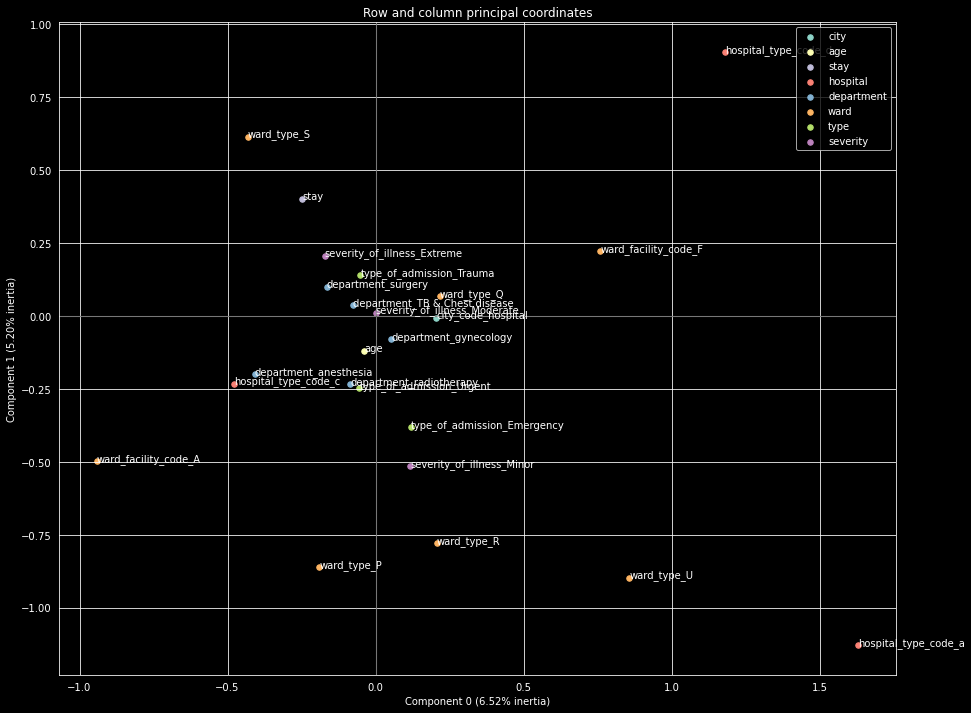

<IPython.core.display.Javascript object>

In [12]:
# hospital region z df mca model object
model = prince.MCA()
mca = model.fit(z_cats)
coordinates = mca.transform(z_cats)

# mca results Visualization
print("Region Z")
ax = mca.plot_coordinates(
    X=z_cats,
    ax=None,
    figsize=(15, 12),
    show_row_points=False,
    #     row_points_size=10,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=True,
    legend_n_cols=1,
)

# Clustering

## Hierarchical

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

<IPython.core.display.Javascript object>

In [16]:
# choose sample of 5% of full dataset
X = df.sample(frac=0.05)
# y = df.stay

<IPython.core.display.Javascript object>

In [24]:
X.drop(columns=["hospital_code"])

,hospital_code,hospital_type_code,city_code_hospital,hospital_region_code,available_extra_rooms_in_hospital,department,ward_type,ward_facility_code,bed_grade,patientid,city_code_patient,type_of_admission,severity_of_illness,visitors_with_patient,age,admission_deposit,stay
case_id,,,,,,,,,,,,,,,,,
196501,16,c,3,Z,4,gynecology,S,A,1.0,111897,5.0,Trauma,Extreme,4,5,4384.0,7
98127,18,d,13,Y,2,gynecology,R,B,3.0,11169,18.0,Urgent,Extreme,3,3,5160.0,2
309732,19,a,7,Y,3,gynecology,Q,C,2.0,117744,8.0,Emergency,Moderate,3,4,5671.0,1
114507,26,b,2,Y,4,gynecology,Q,D,2.0,99891,8.0,Emergency,Moderate,2,2,4036.0,2
25039,29,a,4,X,3,gynecology,R,F,4.0,110825,24.0,Emergency,Moderate,5,4,2621.0,3


<IPython.core.display.Javascript object>

In [21]:
# Defining the agglomerative clustering
agg_cluster = AgglomerativeClustering(
    linkage="average",
    affinity="cosine",
)

# Fit model
clusters = agg_cluster.fit_predict(X)

# ARI and silhouette score
# print("Adjusted Rand Index of the Agglomerative Clustering solution: {}"
#       .format(metrics.adjusted_rand_score(y, clusters)))
# print(
#     "The silhoutte score of the Agglomerative Clustering solution: {}".format(
#         metrics.silhouette_score(X, clusters, metric="euclidean")
#     )
# )

ValueError: could not convert string to float: 'c'

<IPython.core.display.Javascript object>

In [19]:
plt.figure(figsize=(20, 10))
dendrogram(linkage(X, method="complete"))
plt.show()

ValueError: could not convert string to float: 'c'

<Figure size 1440x720 with 0 Axes>

<IPython.core.display.Javascript object>